# <div align="center">Customer Segmentation Analysis</div>

# Importing libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import ListedColormap
from sklearn.model_selection import ParameterGrid
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# Data investigation

In [2]:
#read the data
data_path = 'CC GENERAL.csv'  
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data preprocessing

In [8]:
#make a copy for the original dataset
df_copy=df.copy()

Since the percent of null rows is 3.5% which is very small, so I will drop them.

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
df.drop('CUST_ID', axis=1, inplace=True)
df.shape

(8636, 17)

In [12]:
o_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

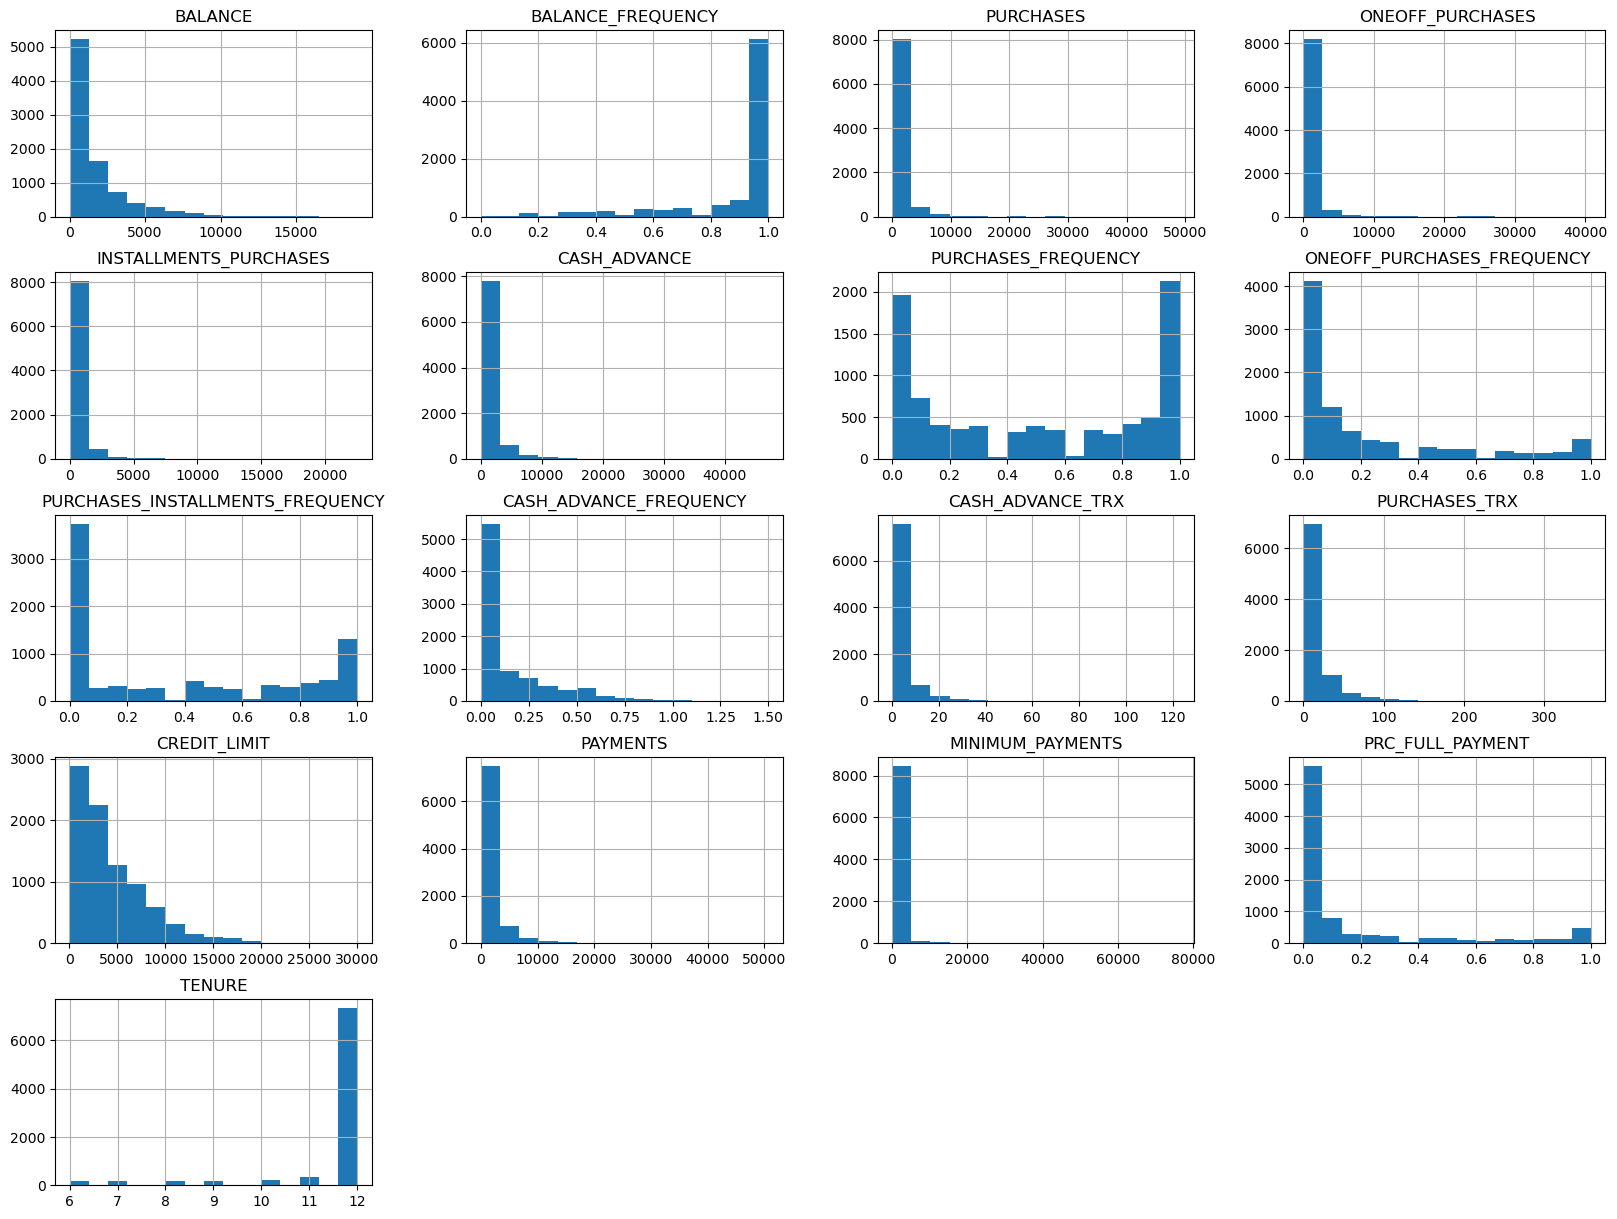

In [13]:
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

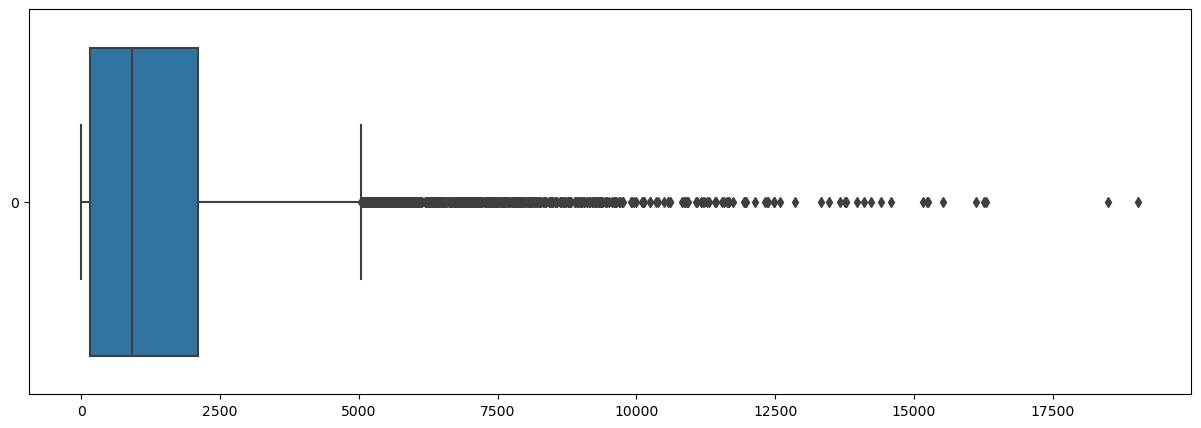

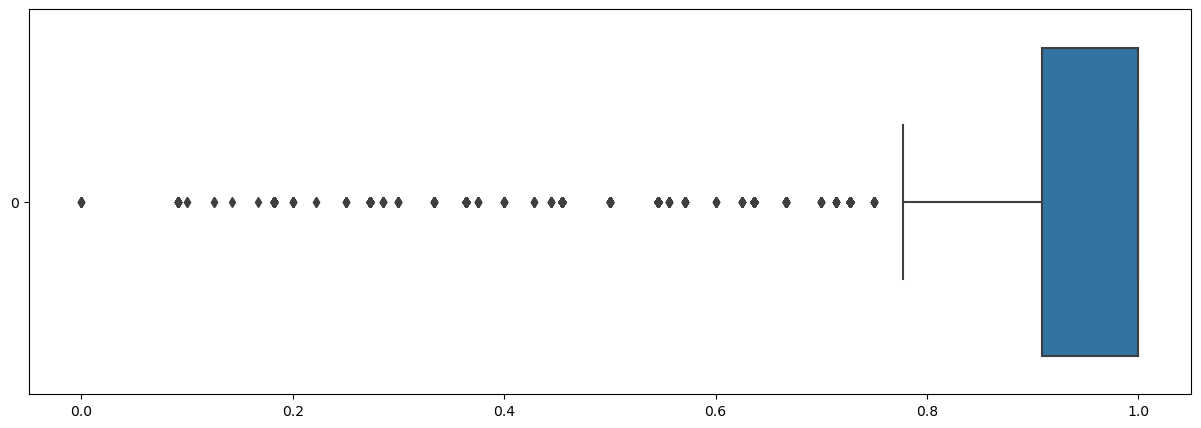

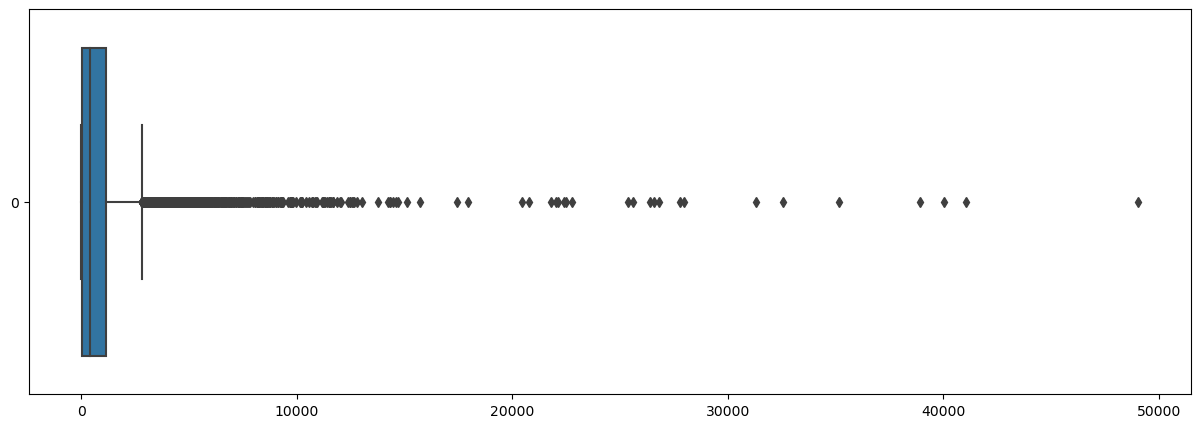

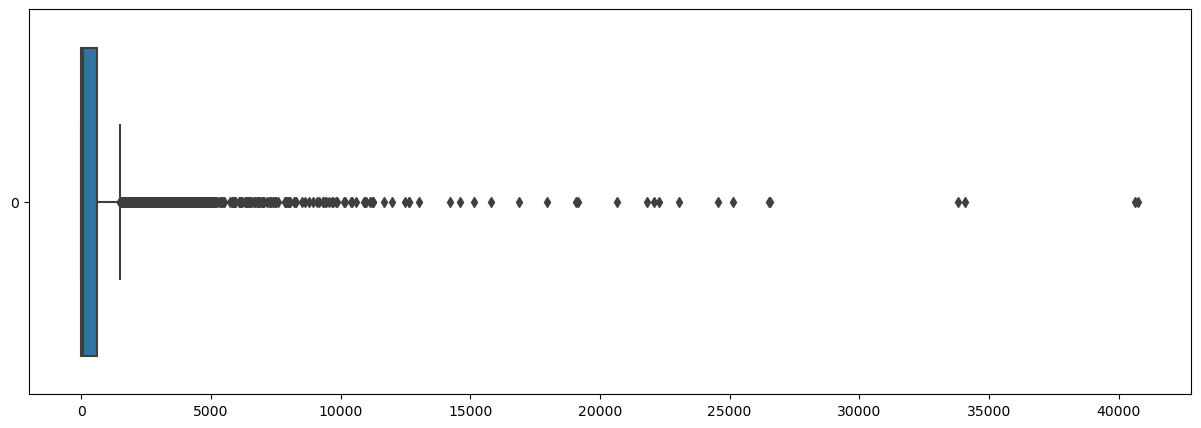

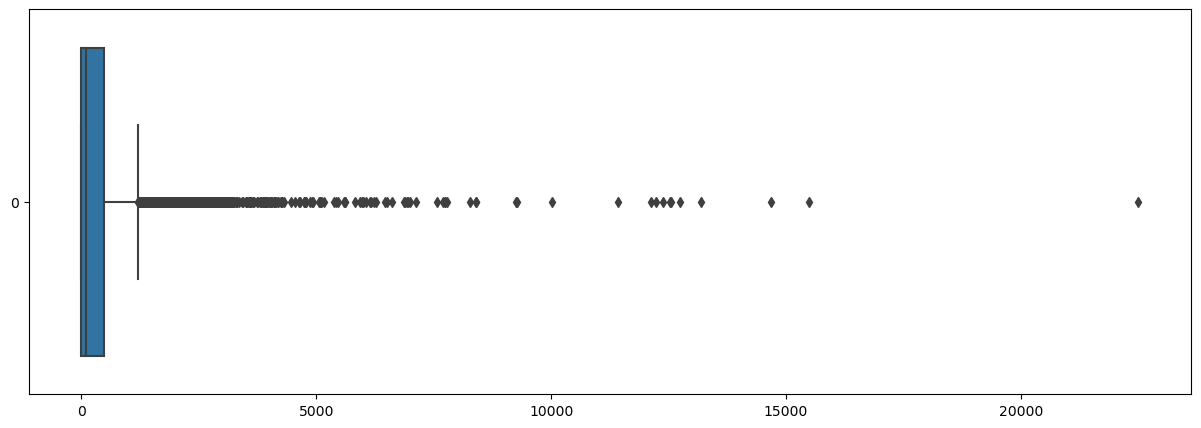

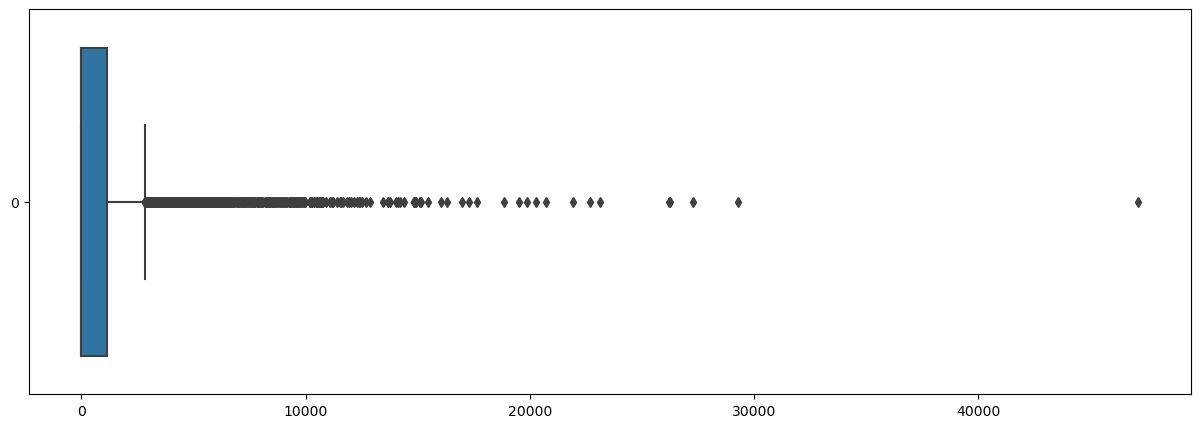

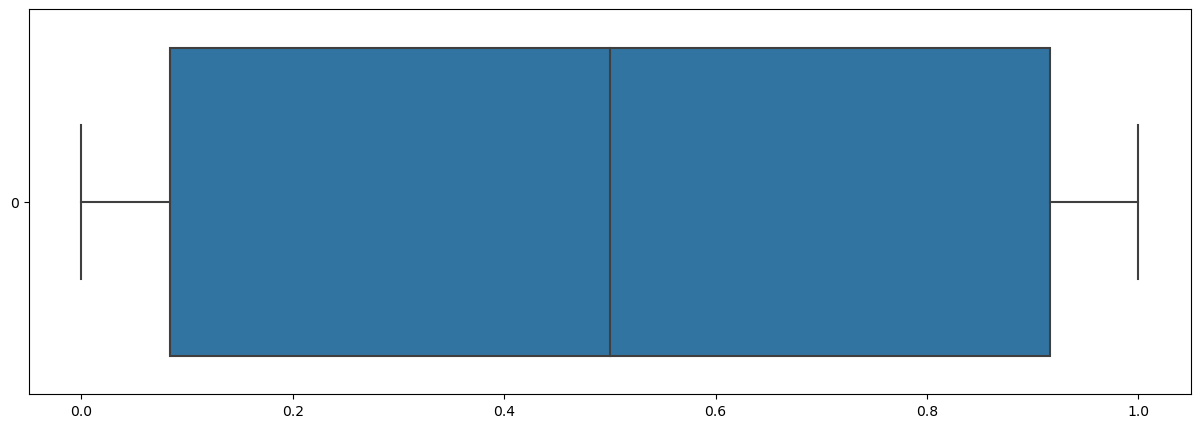

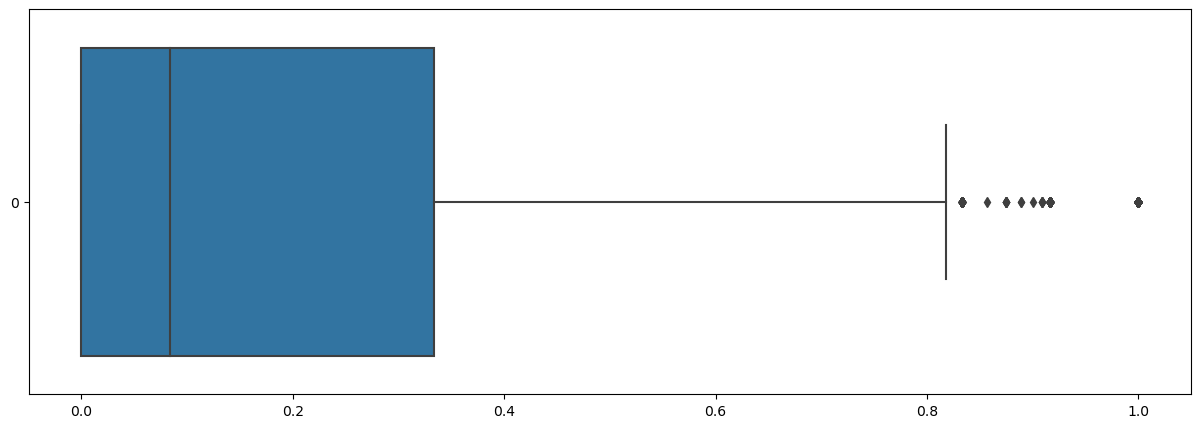

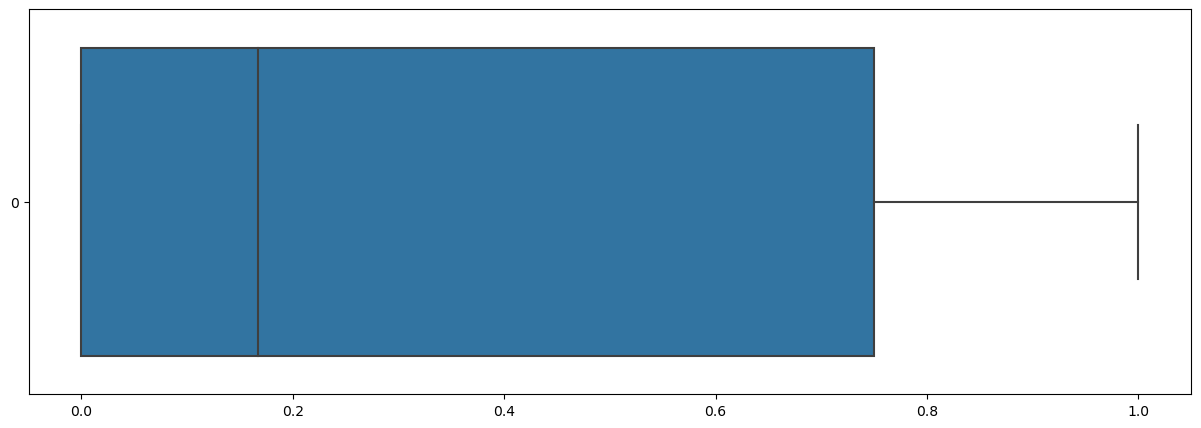

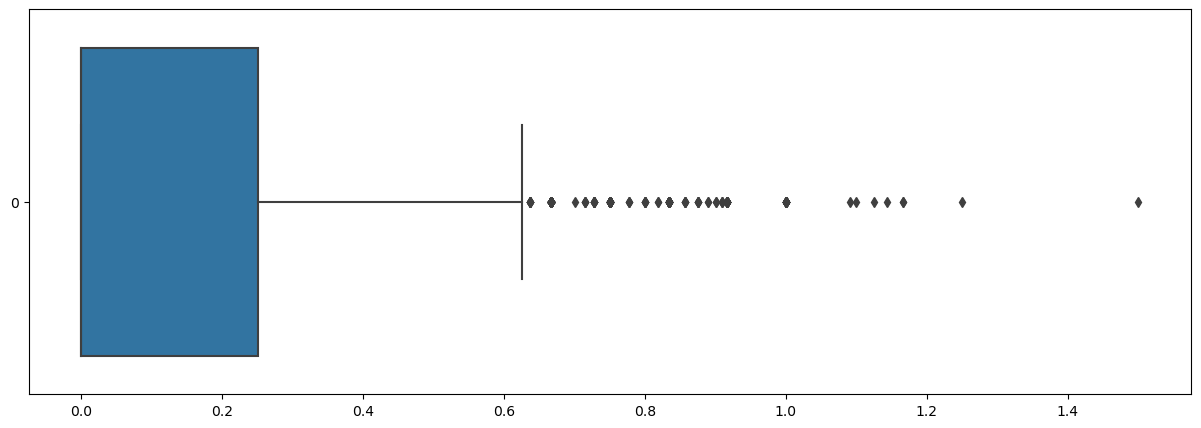

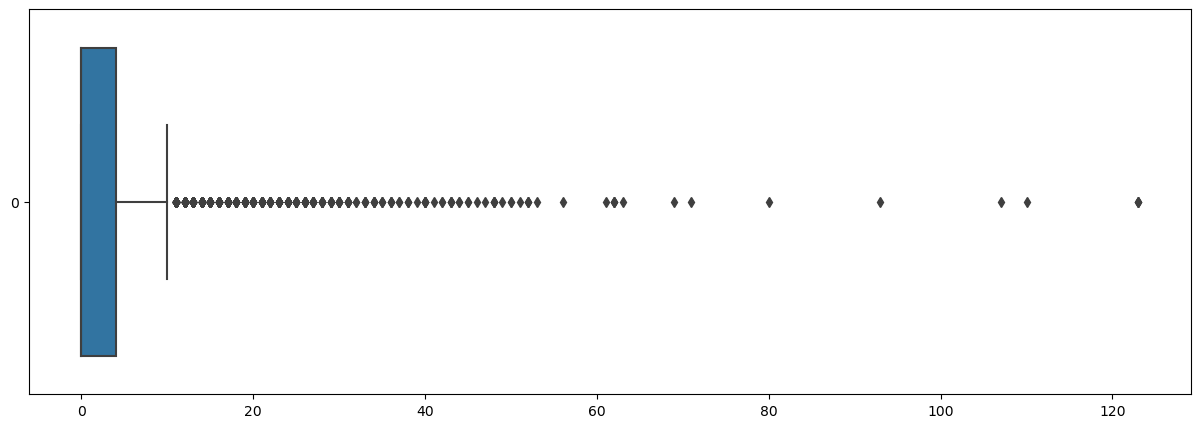

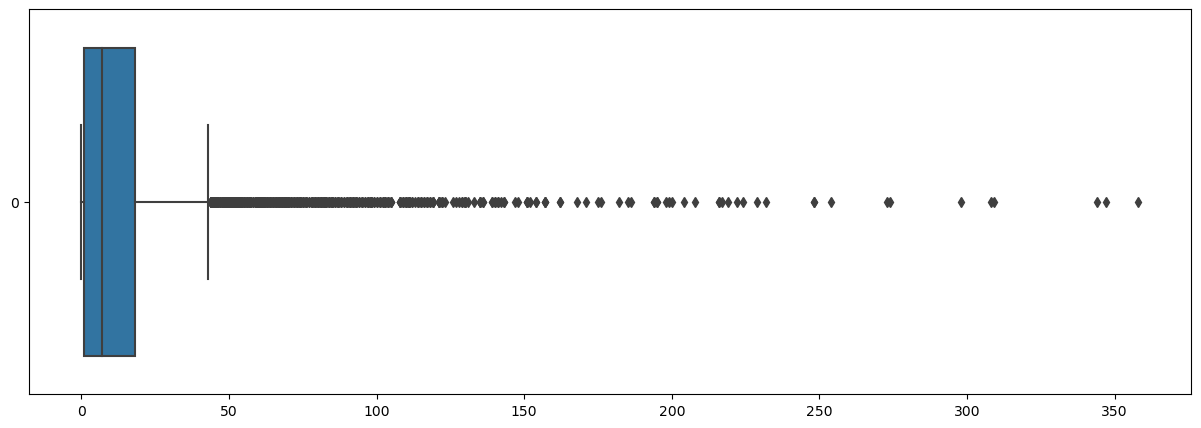

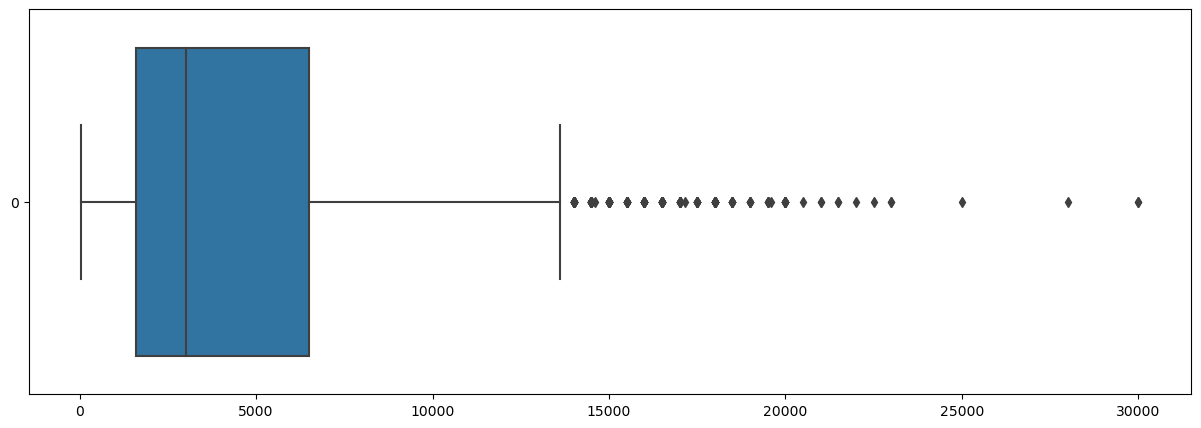

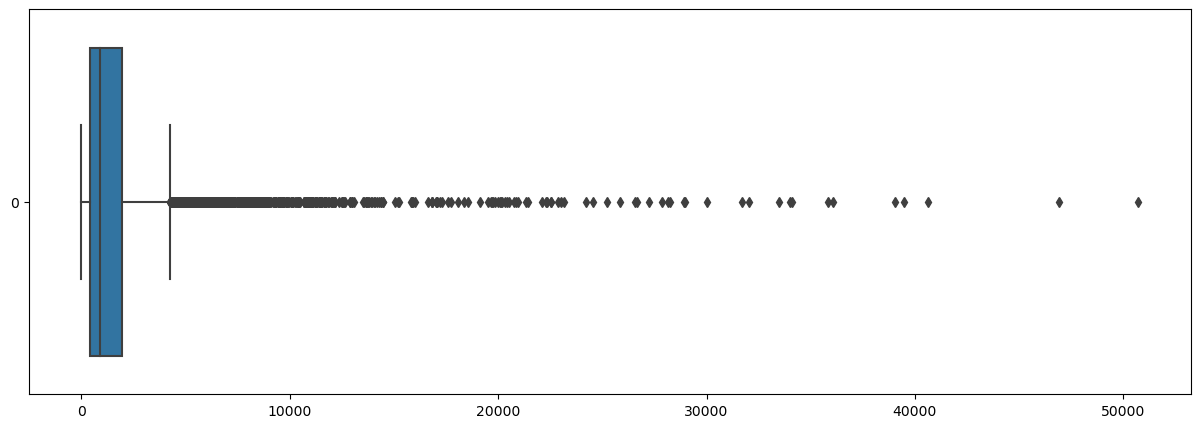

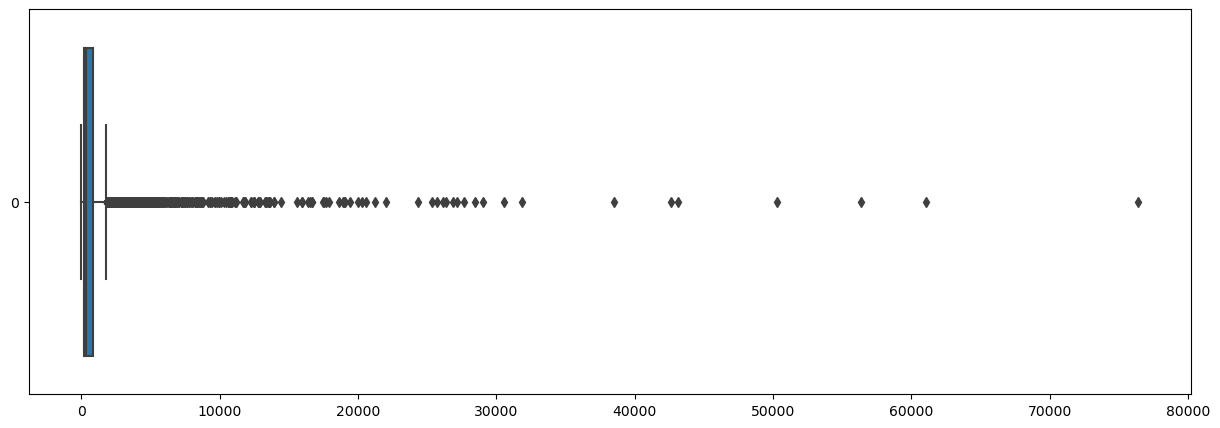

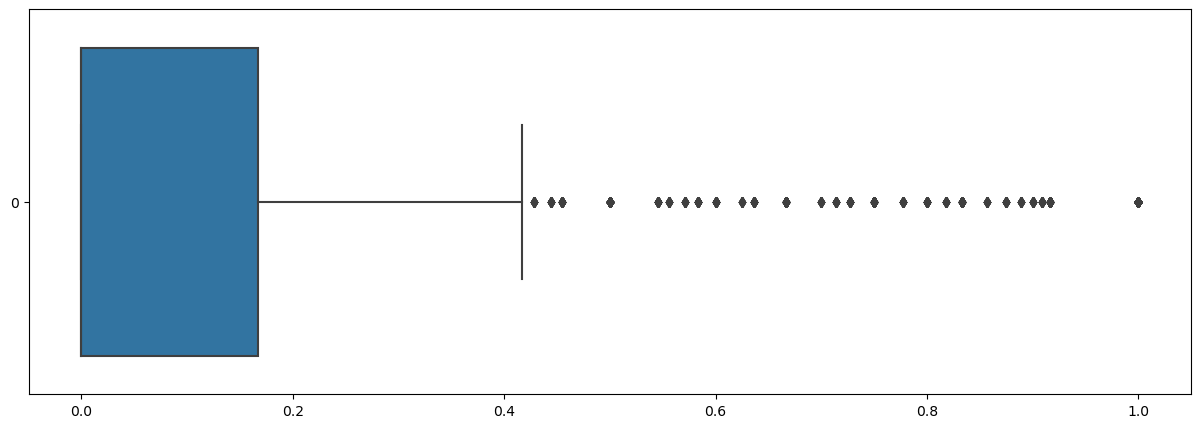

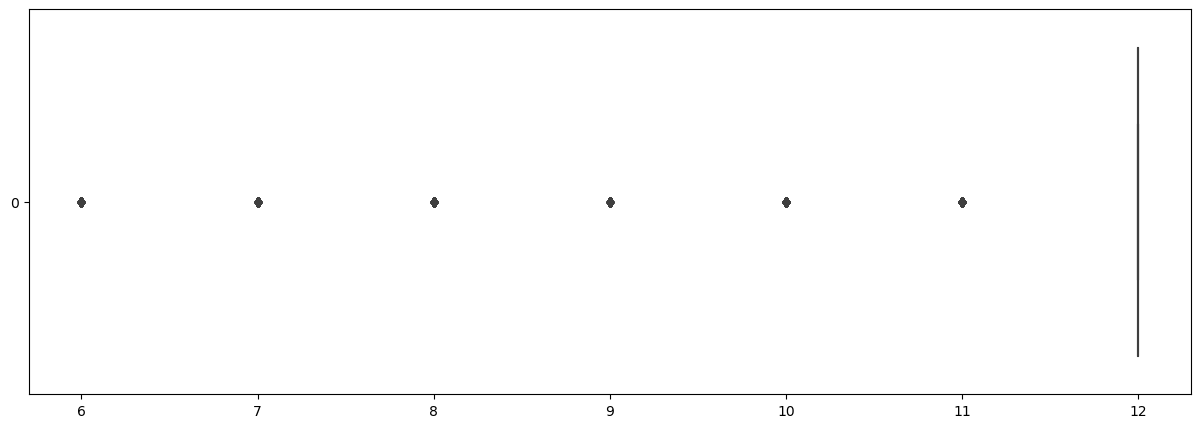

In [14]:
for column in df.columns:
    plt.figure(figsize = (15,5))
    sns.boxplot(df[column] , orient='h')
    plt.show()

Since the dataset has too many outliers , so I will not drop them

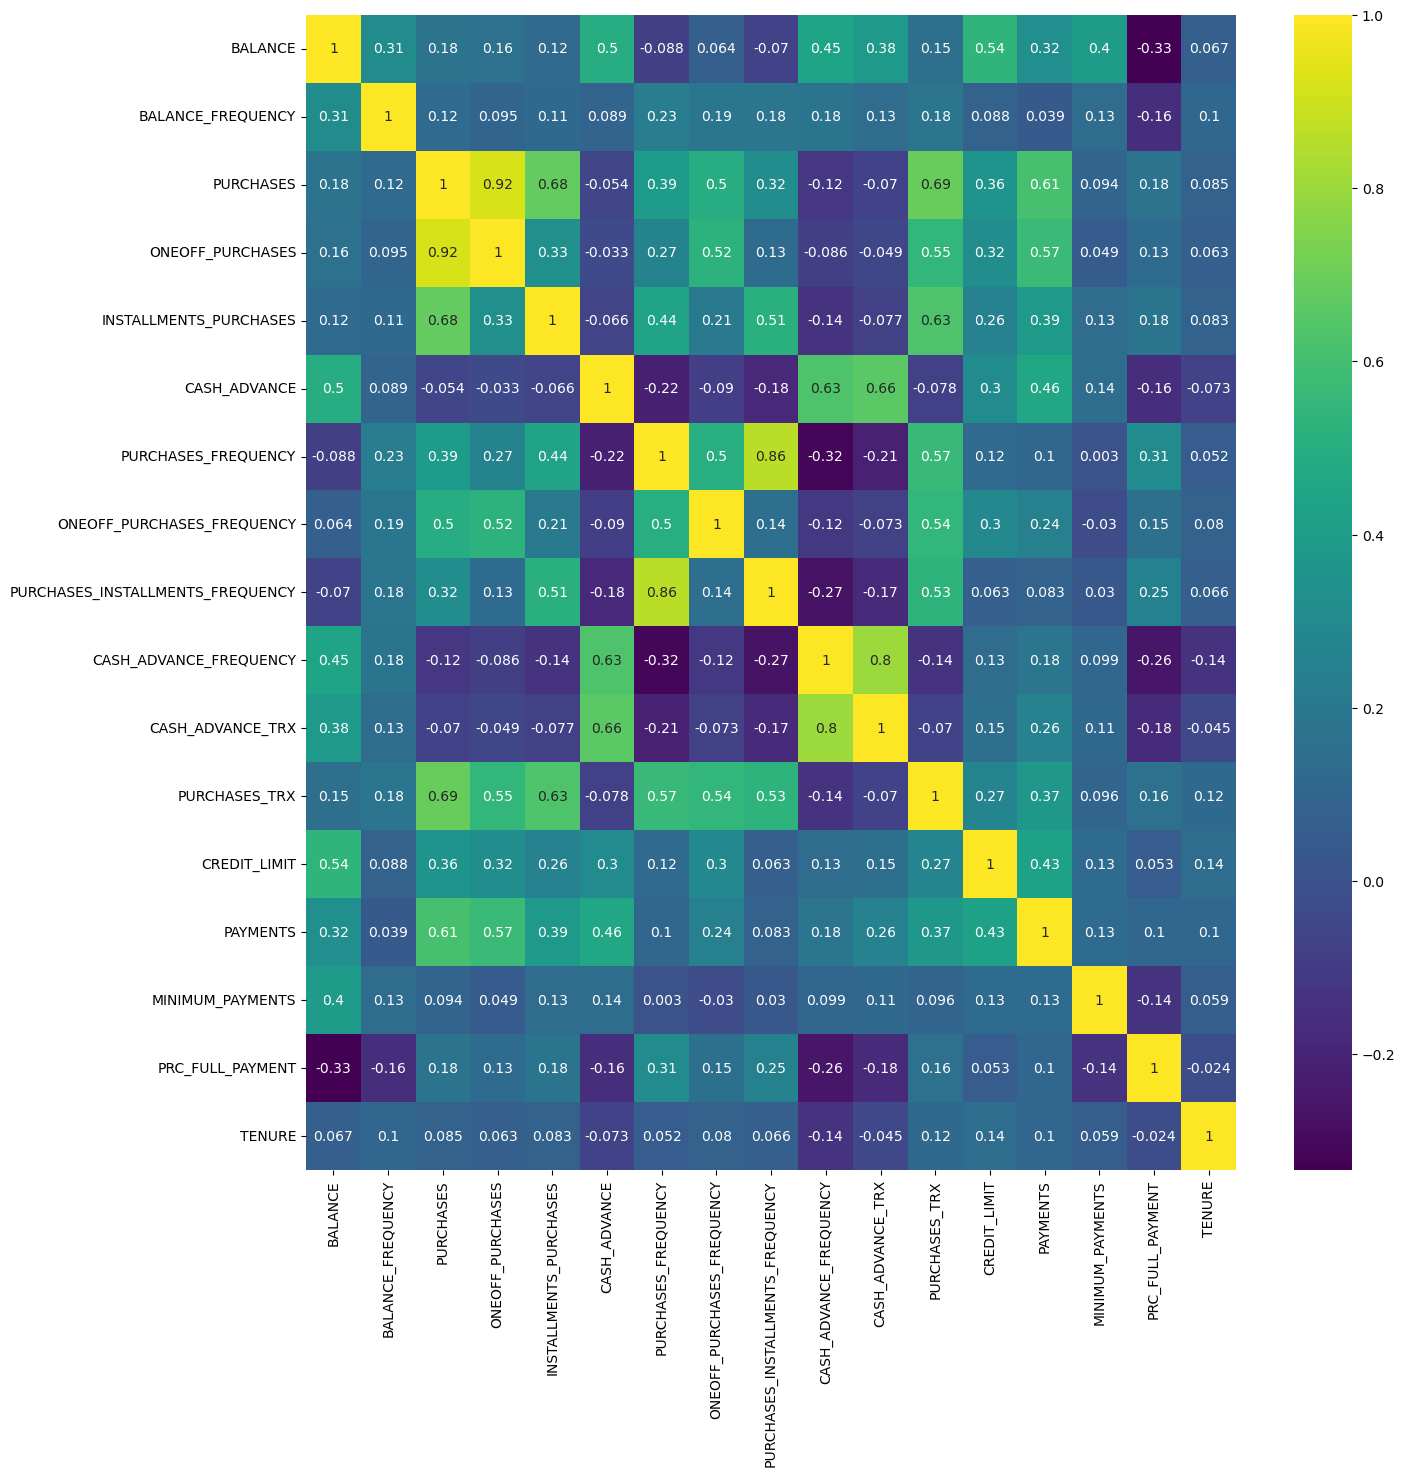

In [15]:
plt.figure(figsize=(15,15))
corr_data = df.corr()
sns.heatmap(corr_data,annot=True , cmap='viridis')
plt.show()

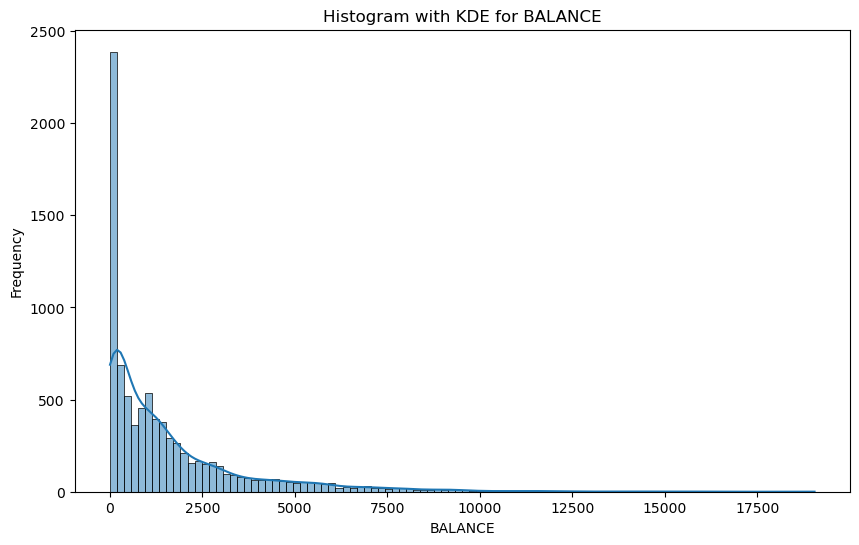

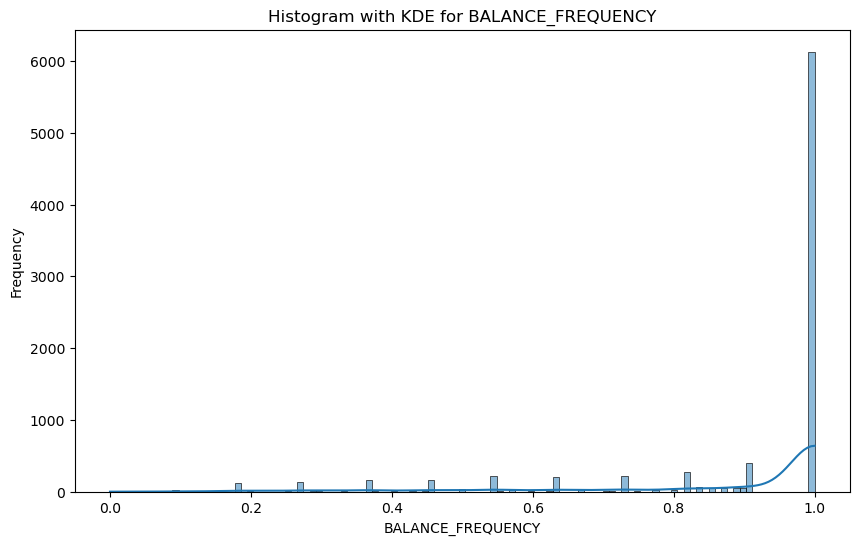

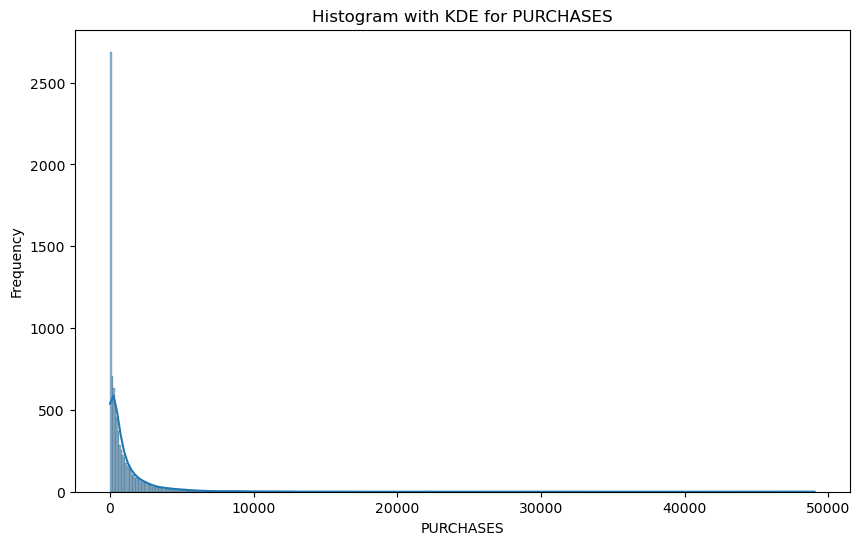

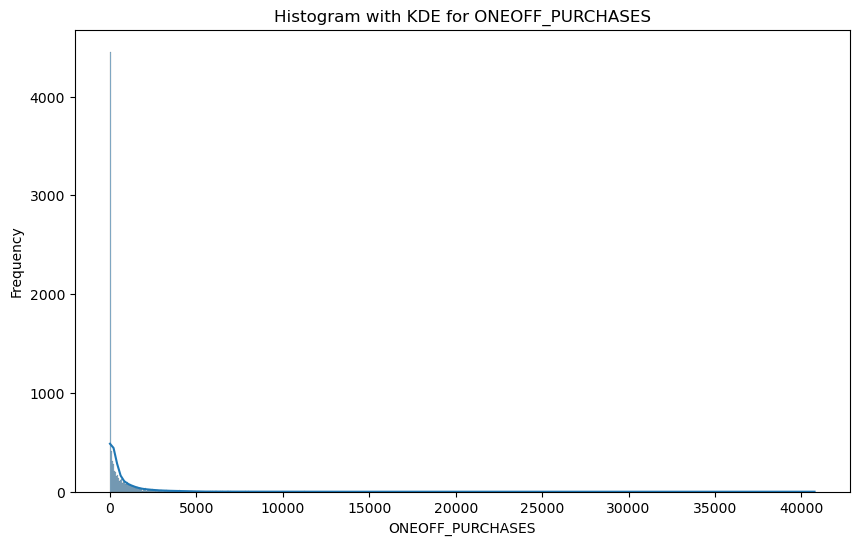

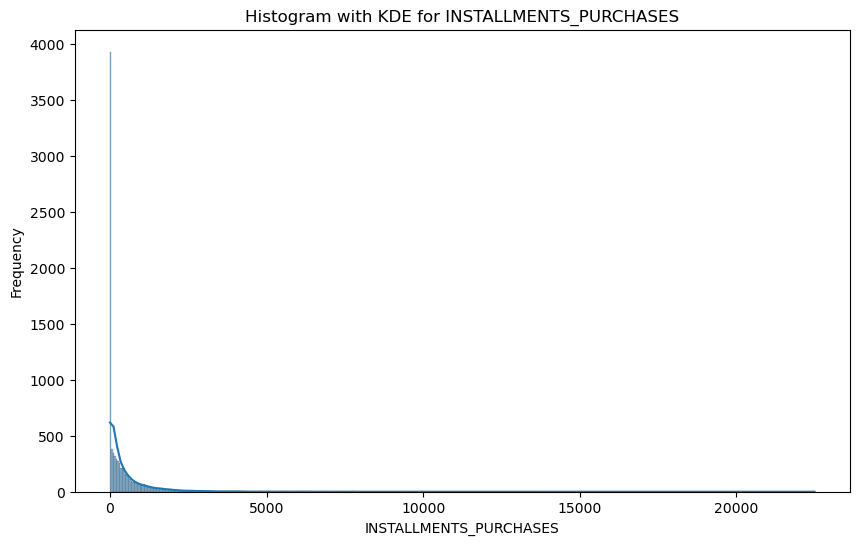

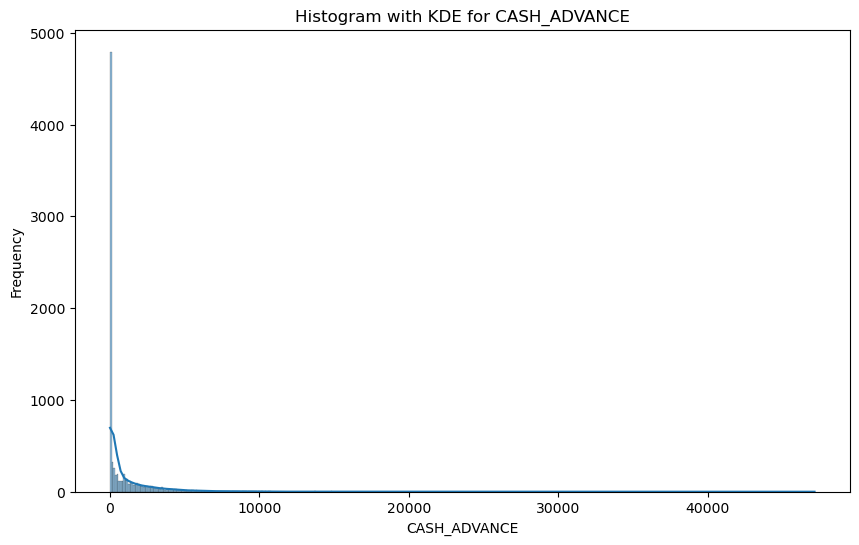

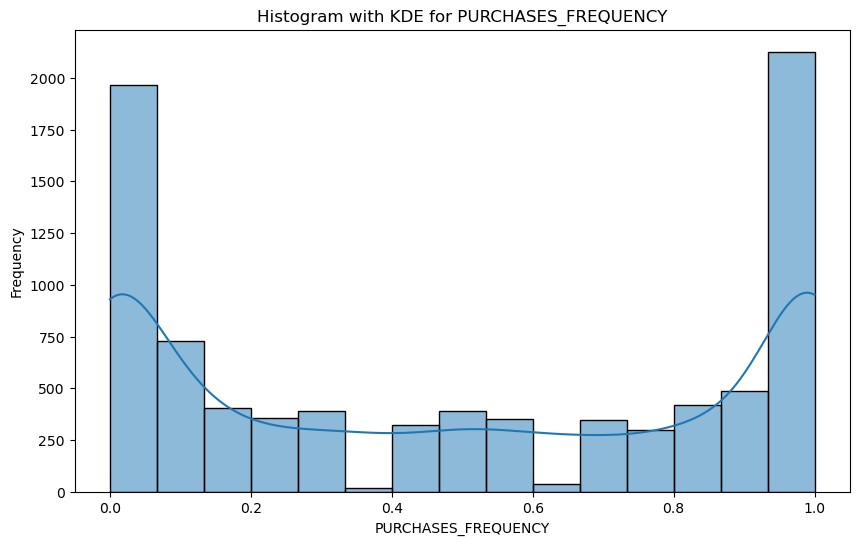

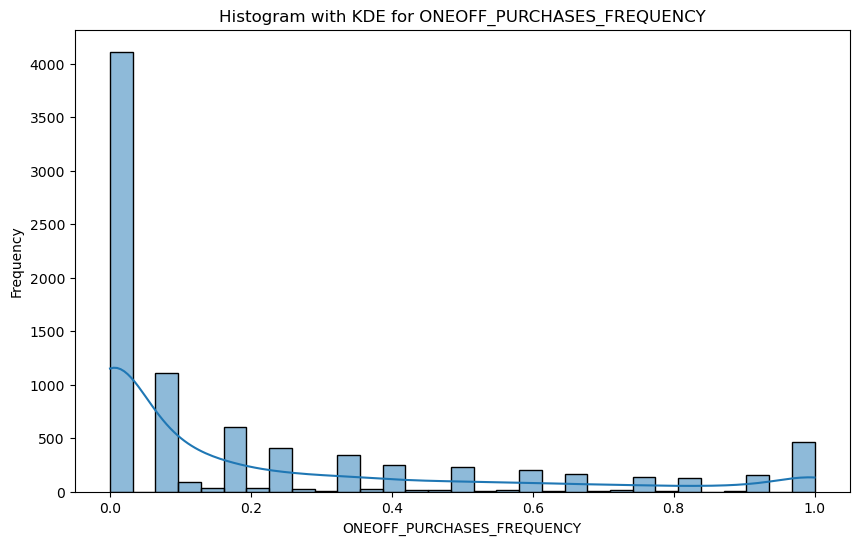

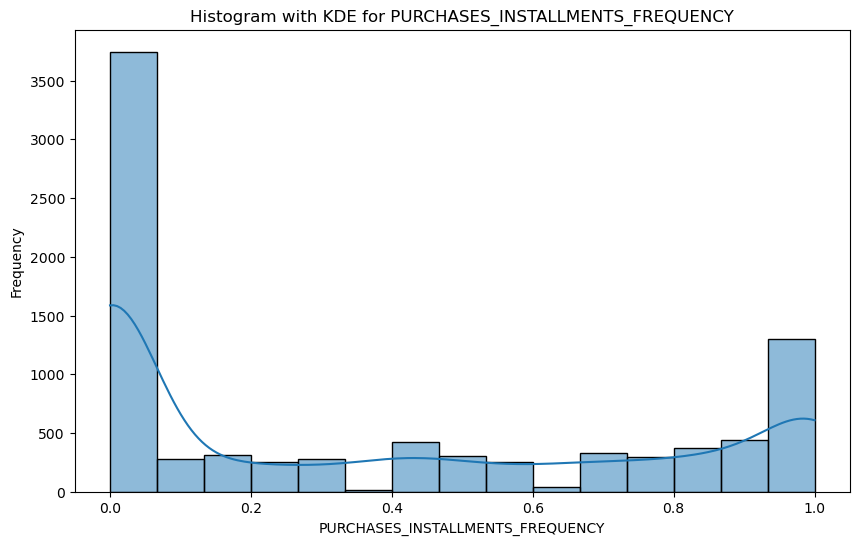

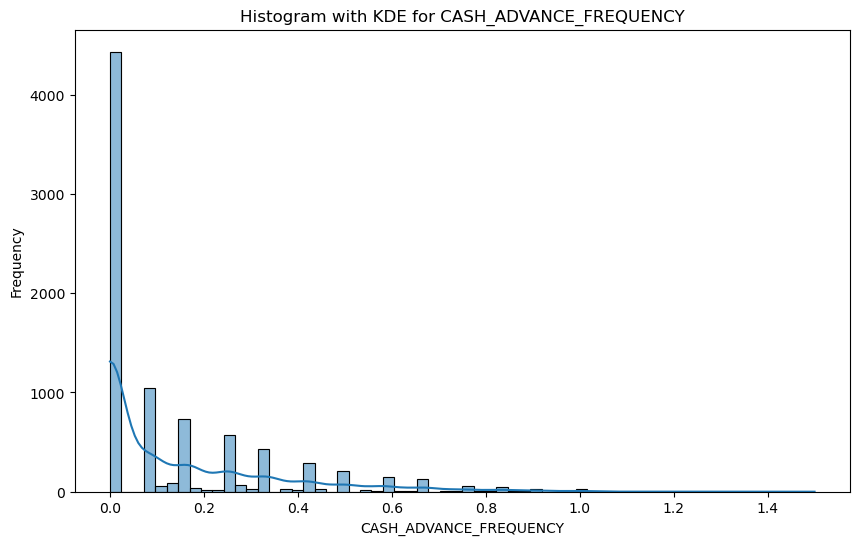

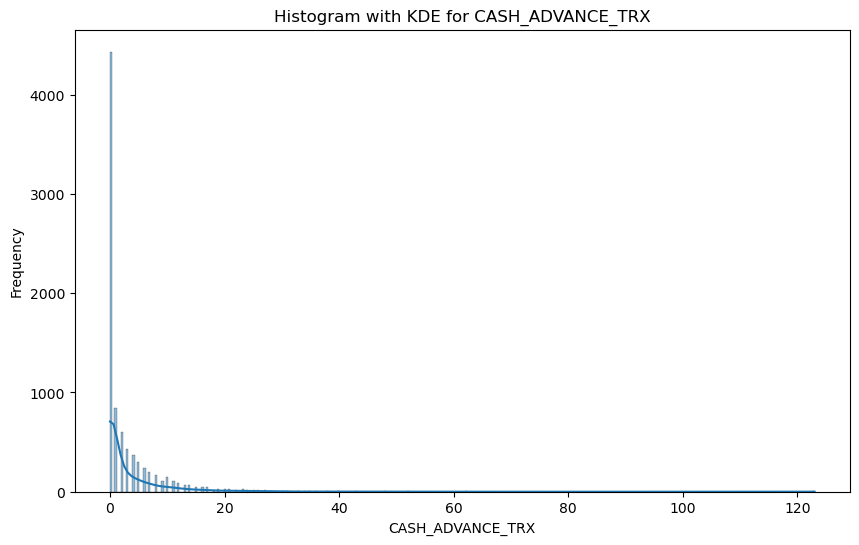

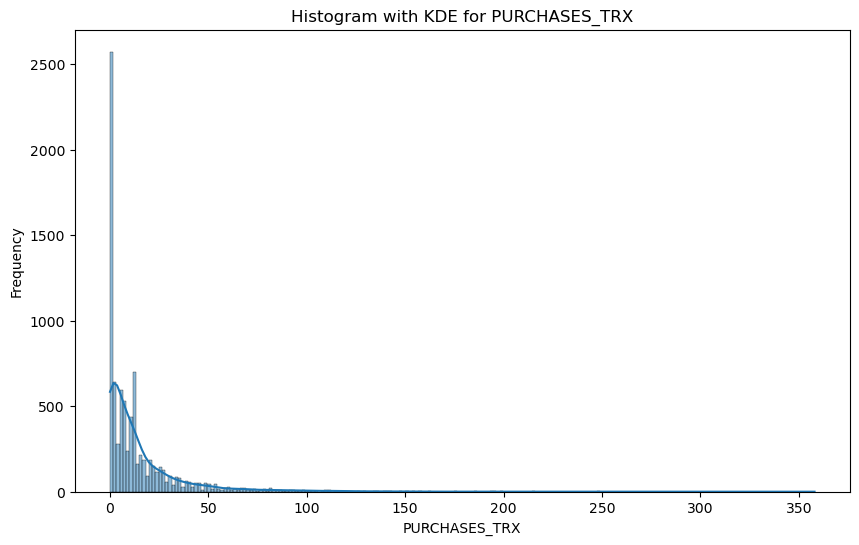

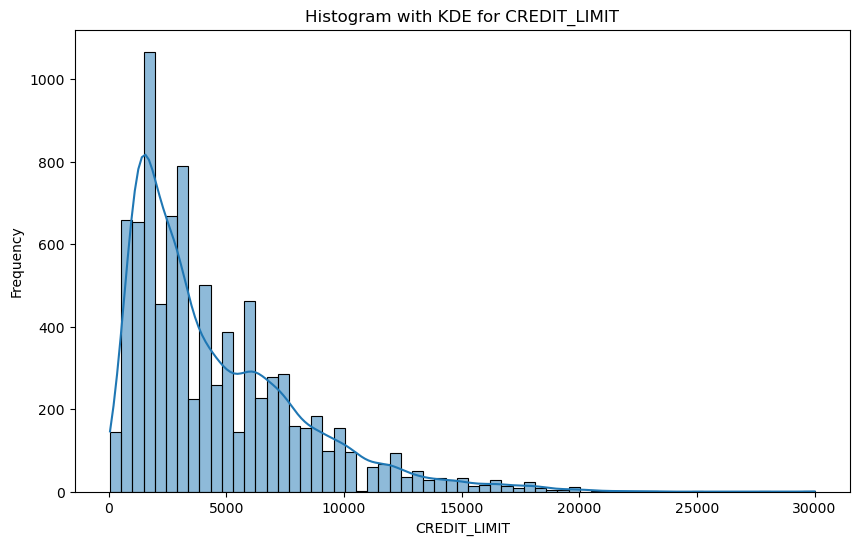

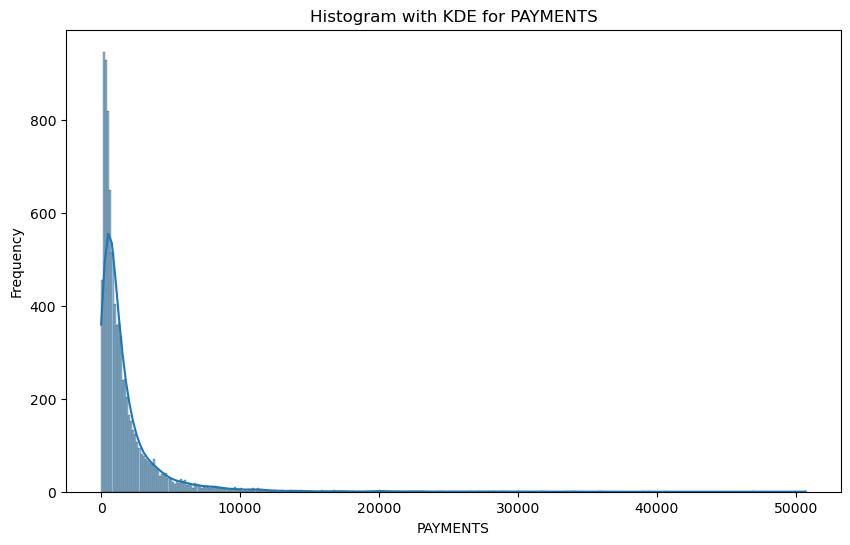

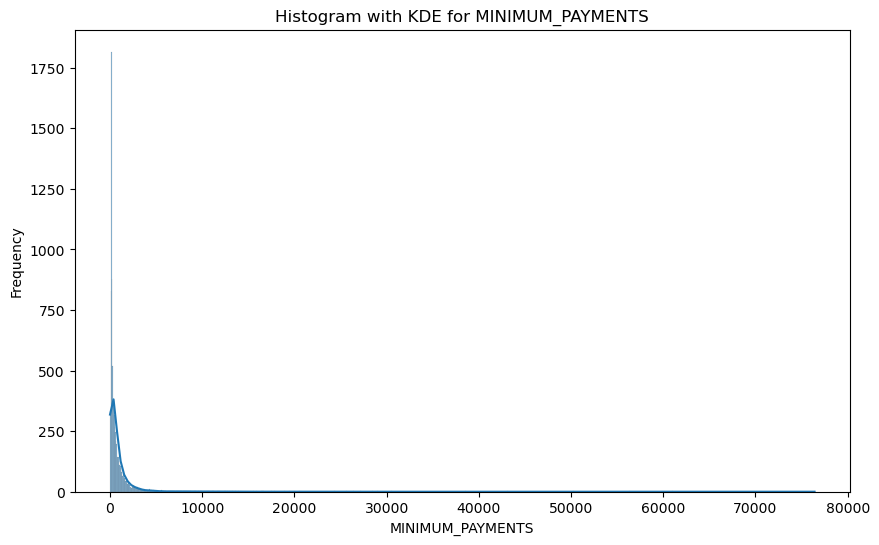

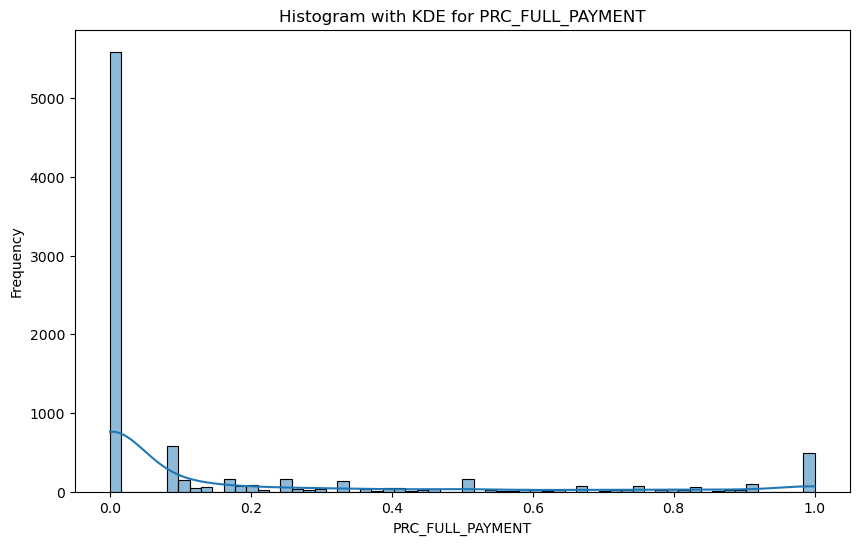

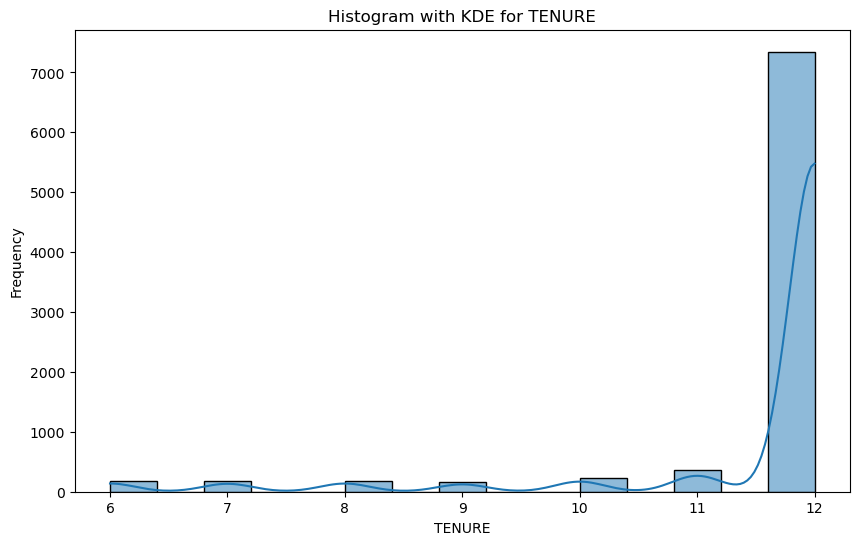

In [16]:
# Plot histograms with KDE for numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

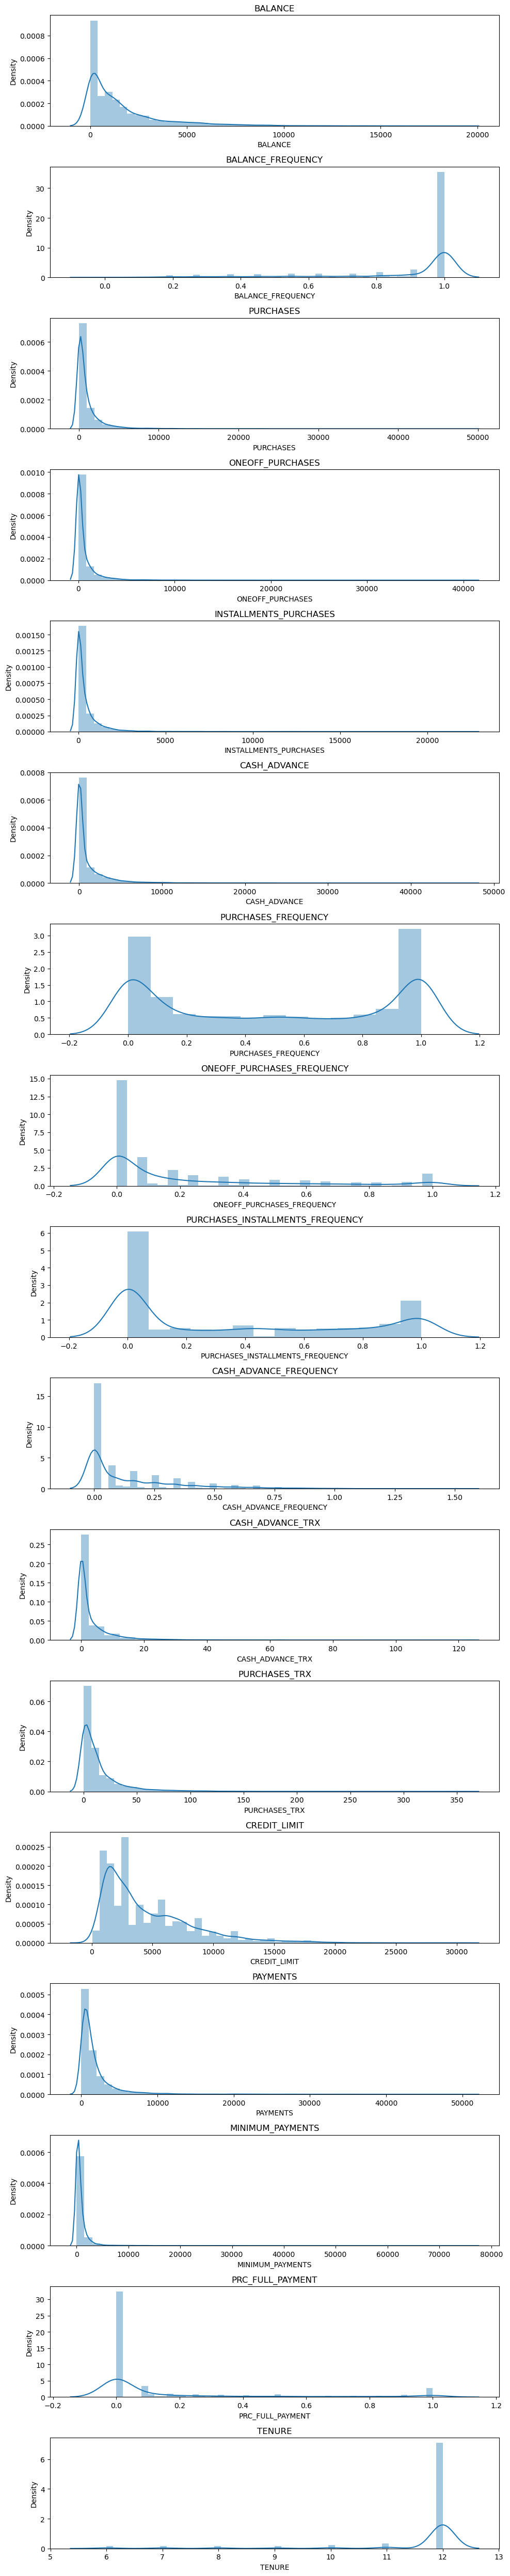

In [17]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    
    plt.subplot(17, 1, i + 1)
    sns.distplot(df[df.columns[i]], kde = True)
    plt.title(df.columns[i])
plt.tight_layout();

# The data is skwed

In [18]:
unbounded_limits_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',  'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','CASH_ADVANCE_TRX','PURCHASES_TRX']
bounded_limits_features = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT','TENURE' ]
log_scaled_data = np.log1p(df[unbounded_limits_features])
log_scaled_data[bounded_limits_features] = df[bounded_limits_features]

In [19]:
log_scaled_data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,3.735304,4.568506,0.000000,4.568506,0.000000,6.908755,5.312231,4.945277,0.000000,1.098612,0.818182,0.166667,0.000000,0.083333,0.00,0.000000,12
1,8.071989,0.000000,0.000000,0.000000,8.770896,8.853808,8.319725,6.978531,1.609438,0.000000,0.909091,0.000000,0.000000,0.000000,0.25,0.222222,12
2,7.822504,6.651791,6.651791,0.000000,0.000000,8.922792,6.434654,6.442994,0.000000,2.564949,1.000000,1.000000,1.000000,0.000000,0.00,0.000000,12
4,6.707735,2.833213,2.833213,0.000000,0.000000,7.090910,6.521114,5.504483,0.000000,0.693147,1.000000,0.083333,0.083333,0.000000,0.00,0.000000,12
5,7.501540,7.196147,0.000000,7.196147,0.000000,7.496097,7.244983,7.786654,0.000000,2.197225,1.000000,0.666667,0.000000,0.583333,0.00,0.000000,12


In [20]:
log_scaled_data.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,6.265737,4.928905,3.239500,3.387883,3.349135,8.099572,6.814890,5.922564,0.829327,1.916439,0.895035,0.496000,0.205909,0.368820,0.137604,0.159304,11.534391
std,1.895982,2.922819,3.252619,3.091009,3.571114,0.822341,1.159994,1.190068,1.015146,1.378707,0.207697,0.401273,0.300054,0.398093,0.201791,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.048326,0.018982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,5.004584,3.792507,0.000000,0.000000,0.000000,7.378384,6.039205,5.136760,0.000000,0.693147,0.909091,0.083333,0.000000,0.000000,0.000000,0.000000,12.000000
50%,6.822040,5.930666,3.828533,4.562106,0.000000,8.006701,6.799809,5.747647,0.000000,2.079442,1.000000,0.500000,0.083333,0.166667,0.000000,0.000000,12.000000
75%,7.652639,7.044888,6.397096,6.184453,7.032964,8.779711,7.576683,6.717196,1.609438,2.944439,1.000000,0.916667,0.333333,0.750000,0.250000,0.166667,12.000000
max,9.854515,10.800403,10.615512,10.021315,10.760839,10.308986,10.834125,11.243832,4.820282,5.883322,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,12.000000


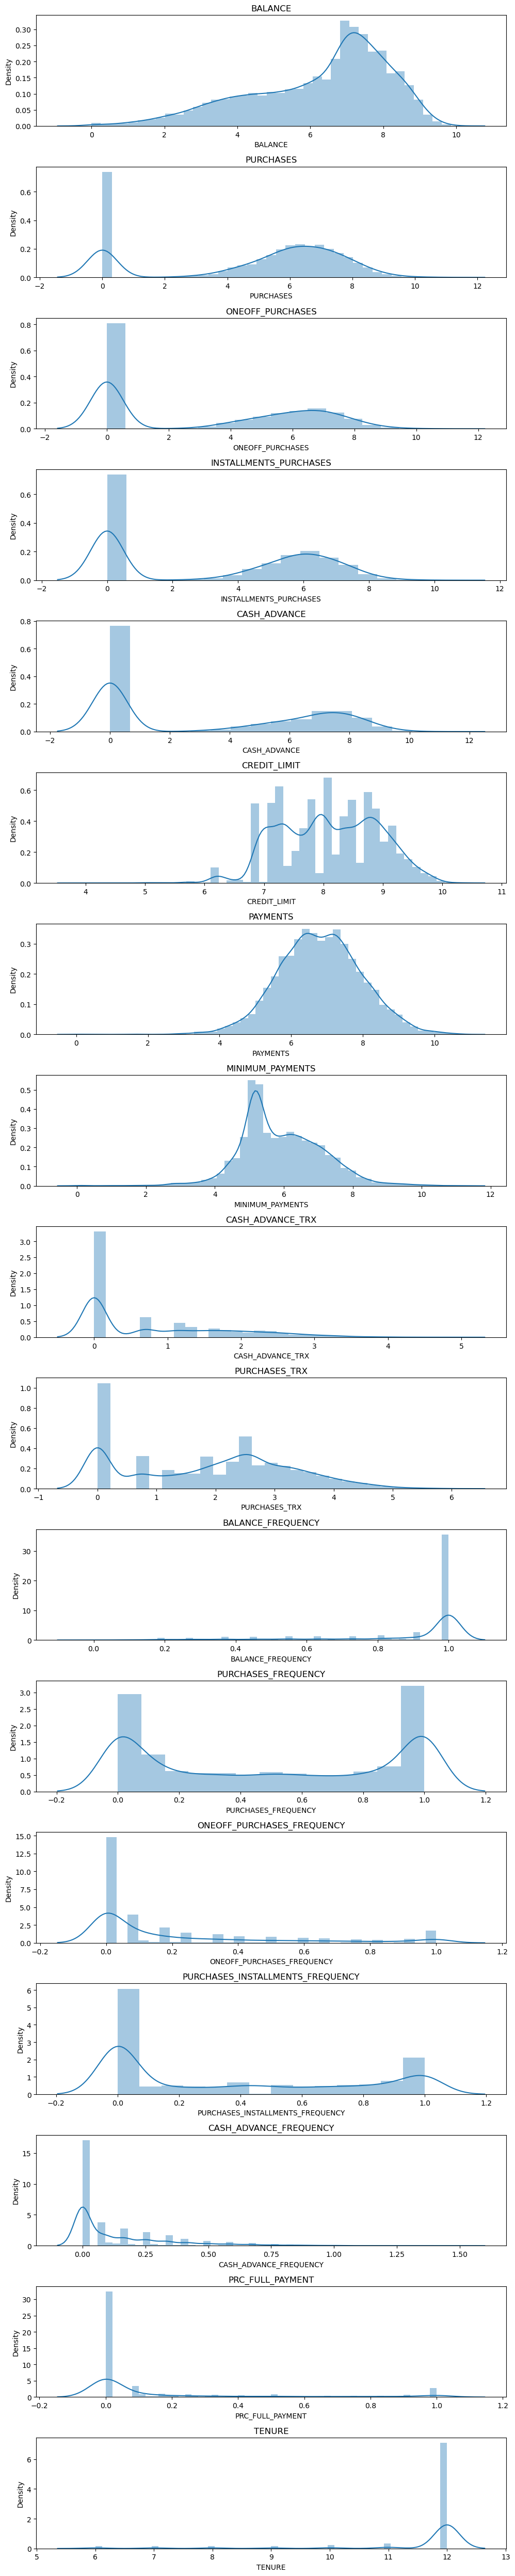

In [21]:
plt.figure(figsize=(10,50))
for i in range(len(log_scaled_data.columns)):
    
    plt.subplot(17, 1, i + 1)
    sns.distplot(log_scaled_data[log_scaled_data.columns[i]], kde = True)
    plt.title(log_scaled_data.columns[i])
plt.tight_layout();

# Finding the best number of K to cluster the data: 

In [25]:
#using elbow method:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i, n_init=50)
    kmean.fit(log_scaled_data)
    cost.append(kmean.inertia_)  

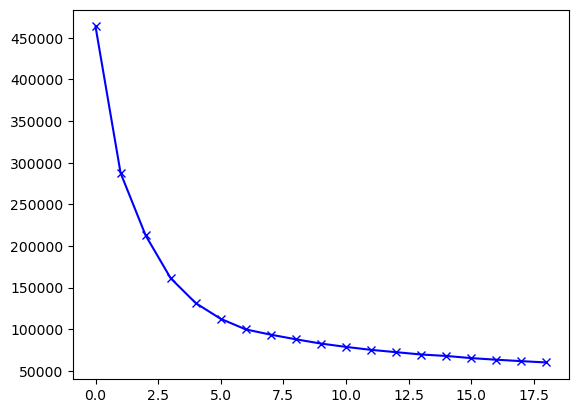

In [26]:
plt.plot(cost, 'bx-')

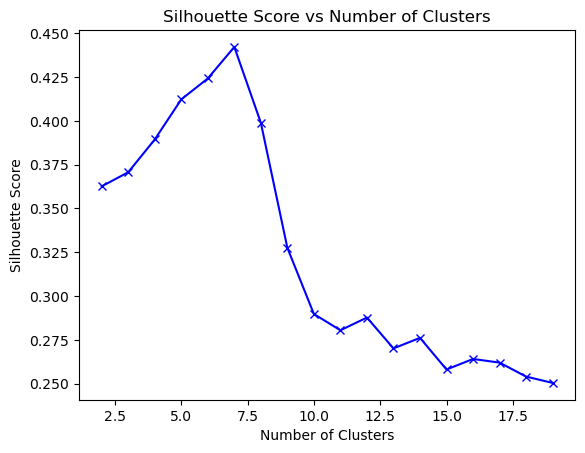

In [27]:
#Using silhouette:
n_clusters = 20
silhouette_scores = []

for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, n_init=50)
    kmeans.fit(log_scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(log_scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range(2, n_clusters), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


# From elbow method and silhouette the best number of K is 7.

# K-MEANS:

In [28]:
kmeans = KMeans(n_clusters=7, n_init=50, max_iter=1000)
kmeans.fit(log_scaled_data)

KMeans(max_iter=1000, n_clusters=7, n_init=50)

In [29]:
clusters = kmeans.labels_
len(clusters)

8636

# Reduce dimensionality using PCA

In [31]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(log_scaled_data)
np.cumsum(pca.explained_variance_ratio_)

array([0.48687148, 0.71775855, 0.85851336])

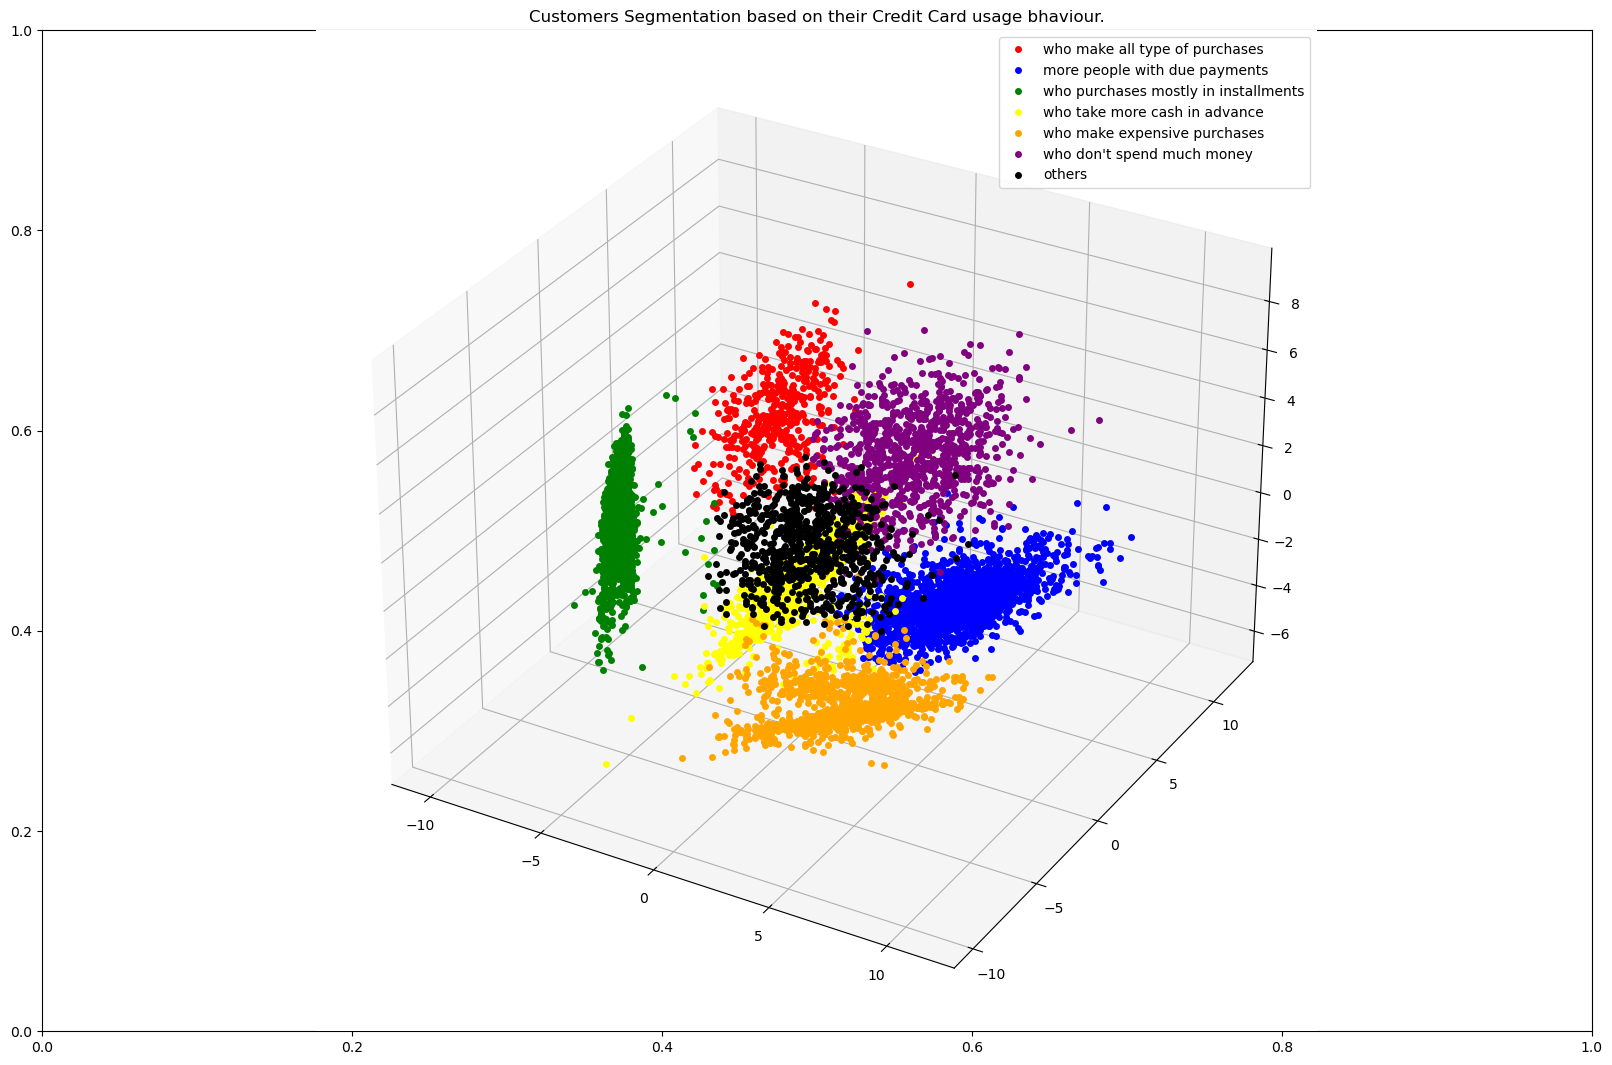

In [32]:
x, y, z = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'black'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money',
         6:'others'}

  
new_df = pd.DataFrame({'x': x, 'y':y, 'z':z,'label':clusters}) 
groups = new_df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.plot(group.x, group.y, group.z, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

# Using t-sne:

In [33]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(log_scaled_data)


In [34]:
x_tsne, y_tsne, z_tsne = X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2]
new_df_tsne = pd.DataFrame({'x': x_tsne, 'y': y_tsne, 'z': z_tsne, 'label': clusters})


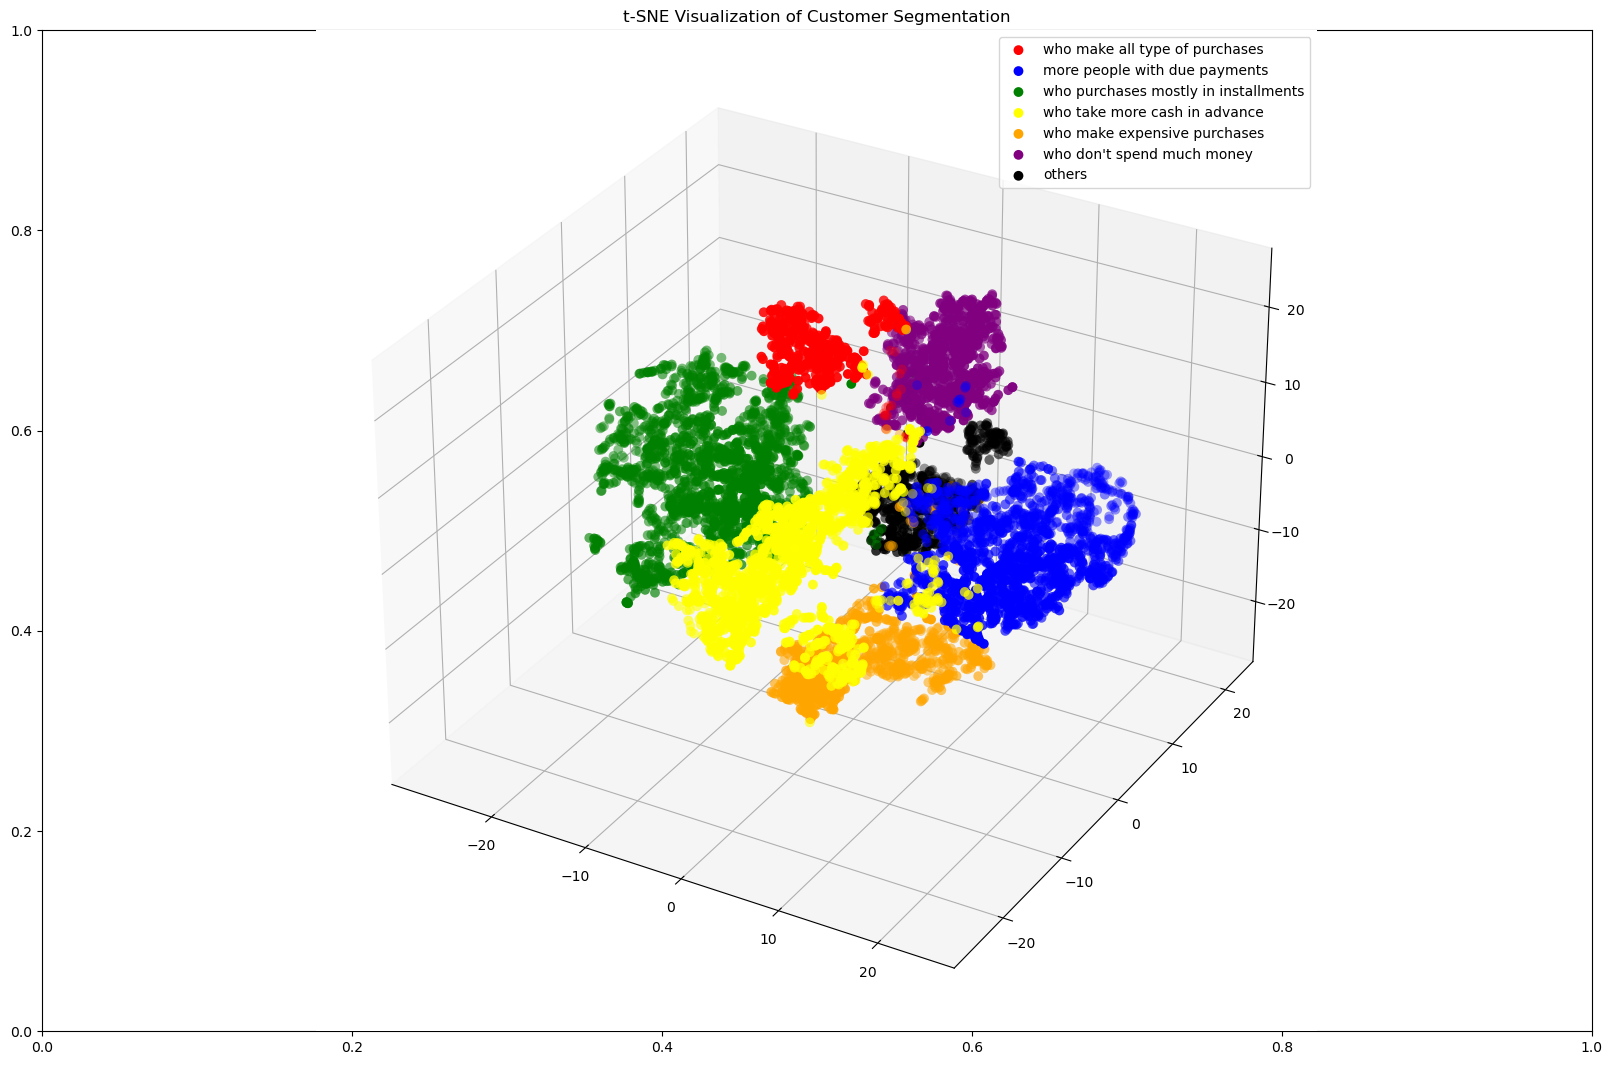

In [35]:
fig, ax = plt.subplots(figsize=(20, 13))
ax = fig.add_subplot(projection='3d')

groups_tsne = new_df_tsne.groupby('label')
for name, group in groups_tsne:
    ax.scatter(group.x, group.y, group.z, marker='o', s=50, color=colors[name], label=names[name], edgecolors='none')

ax.legend()
ax.set_title("t-SNE Visualization of Customer Segmentation")
plt.show()


# Hierircal clustering

In [36]:
# Calculate the linkage matrix using 'ward' method
linkage_matrix = linkage(log_scaled_data, method='ward')


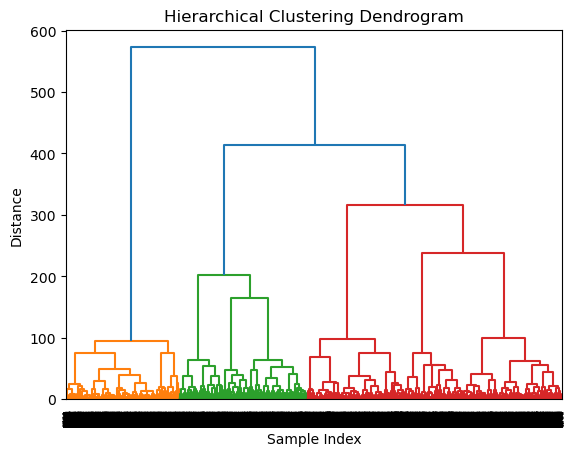

In [37]:
# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [38]:
# Cut the dendrogram to obtain clusters
num_clusters = 7  
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [39]:
df_with_clusters = log_scaled_data.copy()
df_with_clusters['cluster'] = clusters

In [40]:
df_with_clusters

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,4.568506,0.000000,4.568506,0.000000,6.908755,5.312231,4.945277,0.000000,1.098612,0.818182,0.166667,0.000000,0.083333,0.000000,0.000000,12,5
1,8.071989,0.000000,0.000000,0.000000,8.770896,8.853808,8.319725,6.978531,1.609438,0.000000,0.909091,0.000000,0.000000,0.000000,0.250000,0.222222,12,1
2,7.822504,6.651791,6.651791,0.000000,0.000000,8.922792,6.434654,6.442994,0.000000,2.564949,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12,6
4,6.707735,2.833213,2.833213,0.000000,0.000000,7.090910,6.521114,5.504483,0.000000,0.693147,1.000000,0.083333,0.083333,0.000000,0.000000,0.000000,12,6
5,7.501540,7.196147,0.000000,7.196147,0.000000,7.496097,7.244983,7.786654,0.000000,2.197225,1.000000,0.666667,0.000000,0.583333,0.000000,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,1.927413,3.086487,3.086487,0.000000,0.000000,6.216606,4.088408,3.794898,0.000000,0.693147,0.500000,0.166667,0.166667,0.000000,0.000000,0.000000,6,6
8945,3.384170,5.677165,0.000000,5.677165,0.000000,6.908755,5.788719,3.909748,0.000000,1.945910,1.000000,1.000000,0.000000,0.833333,0.000000,0.500000,6,5
8947,3.194529,4.979489,0.000000,4.979489,0.000000,6.908755,4.410016,4.423869,0.000000,1.791759,0.833333,0.833333,0.000000,0.666667,0.000000,0.250000,6,5
8948,2.671218,0.000000,0.000000,0.000000,3.625907,6.216606,3.980615,4.038755,1.098612,0.000000,0.833333,0.000000,0.000000,0.000000,0.166667,0.250000,6,1


# DBSCAN:

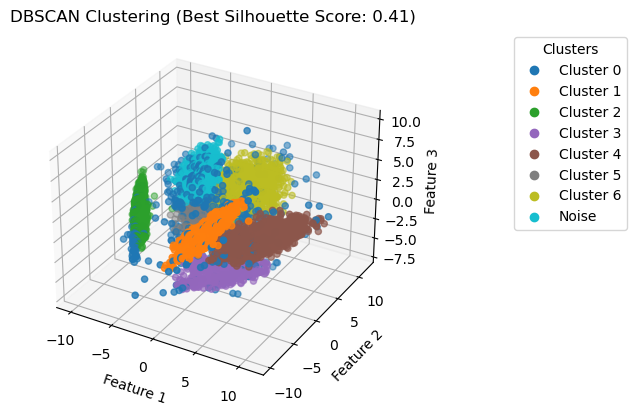

Best parameters: {'eps': 2.7222222222222223, 'min_samples': 100}
Best silhouette score: 0.40814673394598583


In [41]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import ParameterGrid

X = log_scaled_data

# Applying PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

best_score = -1
best_params = None

# Define a range of hyperparameter values
param_grid = {'eps': np.linspace(0.5, 3.0, 10),
              'min_samples': [50, 100, 150, 200]}

# Minimum number of clusters criterion
min_num_clusters = 2

# Perform grid search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    y_dbscan = dbscan.fit_predict(X)
    
    # Check if there are at least 'min_num_clusters' in the clustering result
    if len(set(y_dbscan)) >= min_num_clusters:
        # Use silhouette score as the evaluation metric
        score = silhouette_score(X, y_dbscan)
        
        if score > best_score:
            best_score = score
            best_params = params

# Applying DBSCAN with the best parameters
best_dbscan = DBSCAN(**best_params)
y_dbscan_best = best_dbscan.fit_predict(X)

# Get the number of unique clusters (excluding noise, which is labeled as -1)
num_clusters_best = len(set(y_dbscan_best)) - (1 if -1 in y_dbscan_best else 0)

# Creating a custom colormap with different colors for each cluster
colors_best = plt.cm.tab10(np.linspace(0, 1, num_clusters_best + 1))

cmap_best = ListedColormap(colors_best)

# Plotting the results with the best parameters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter_best = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_dbscan_best, cmap=cmap_best)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title(f"DBSCAN Clustering (Best Silhouette Score: {best_score:.2f})")

# Creating a legend outside the plot area
legend_labels_best = [f'Cluster {i}' for i in range(num_clusters_best)]
legend_labels_best.append('Noise')
legend_best = ax.legend(handles=scatter_best.legend_elements()[0], labels=legend_labels_best, title="Clusters", loc='upper left', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(right=0.7)
plt.show()

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)


# GMM:

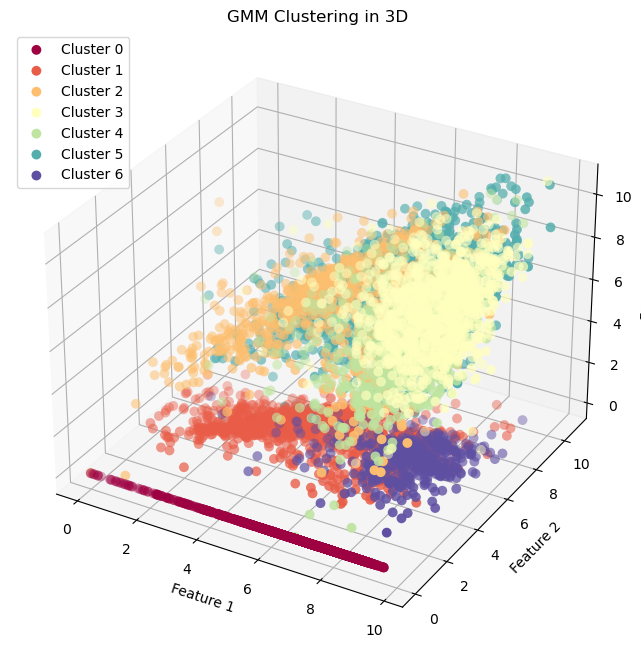

In [43]:
# Apply GMM on log_scaled_data
num_components = 7  
gmm = GaussianMixture(n_components=num_components, random_state=42)
clusters = gmm.fit_predict(log_scaled_data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    x = log_scaled_data.iloc[clusters == k, 0]  
    y = log_scaled_data.iloc[clusters == k, 1]  
    z = log_scaled_data.iloc[clusters == k, 2]  

    ax.scatter(x, y, z, s=50, c=[col], marker='o', edgecolors='none', label=f'Cluster {k}')

ax.set_title('GMM Clustering in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()


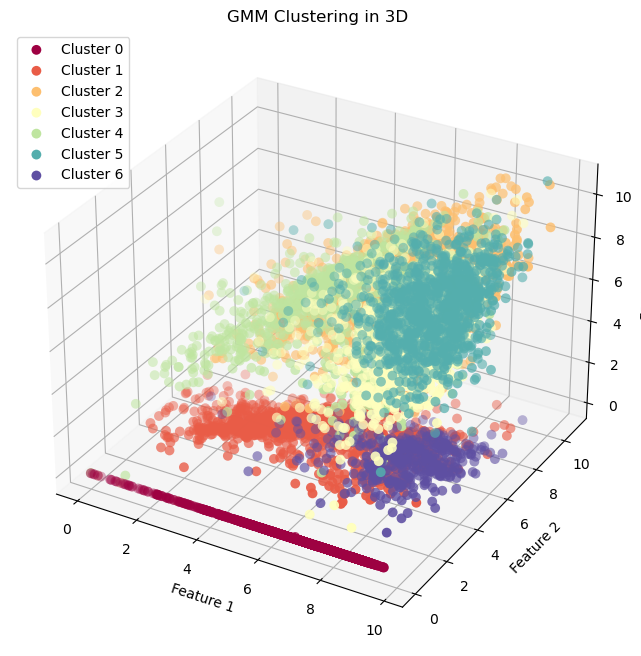

In [44]:
# Apply GMM on X_pca data
num_components = 7  
gmm = GaussianMixture(n_components=num_components, random_state=42)
clusters = gmm.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    x = log_scaled_data.iloc[clusters == k, 0]  
    y = log_scaled_data.iloc[clusters == k, 1]  
    z = log_scaled_data.iloc[clusters == k, 2]  

    ax.scatter(x, y, z, s=50, c=[col], marker='o', edgecolors='none', label=f'Cluster {k}')

ax.set_title('GMM Clustering in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()